In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

C:\Users\Adittiya Rao\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
root_dir = 'ExDark'
annotations_file = 'imageclasslist.txt'

In [3]:
light_dic = {1:'Low',2: 'Ambient',3:'Object',4:'Single',5:'Weak',6:'Strong',7:'Screen',8:'Window',9:'Shadow',10:'Twilight'}
class_dic = {1:'Bicycle',2:'Boat',3:'Bottle',4:'Bus',5:'Car',6:'Cat',7:'Chair',8:'Cup',9:'Dog',10:'Motorbike',11:'People',12:'Table'}
in_out_dic = {1:'Indoor',2:'outdoor'}
train_val_test = {1:'train',2:'val',3:'test'}

In [5]:
file_path =[]
labels =[]
lightings = []
indoor_outdoor =[]
train_val_test =[]

with open(annotations_file,'r') as f:
    for i,line in enumerate(f):
        if i==0:
            continue
        label = int(line.split()[1])
        light = int(line.split()[2])
        in_out = int(line.split()[3])
        dataset = int(line.split()[4])
        
        path = root_dir+'/'+class_dic[label]+'/'+line.split()[0]+'.txt'
        file_path.append(path)
        labels.append(label)
        lightings.append(light)
        indoor_outdoor.append(in_out)
        train_val_test.append(dataset)

In [6]:
df = {'path':file_path, 'classes':labels, 'light':lightings, 'indoor_outdoor':indoor_outdoor,'train_val_test':train_val_test}
data = pd.DataFrame(df)

In [7]:
print('Dataset shape:',data.shape)
data.head()

Dataset shape: (7363, 5)


path  classes  light  indoor_outdoor  \
0  ExDark/Bicycle/2015_00001.png.txt        1      2               1   
1  ExDark/Bicycle/2015_00002.png.txt        1      6               2   
2  ExDark/Bicycle/2015_00003.png.txt        1      5               2   
3  ExDark/Bicycle/2015_00004.jpg.txt        1      3               2   
4  ExDark/Bicycle/2015_00005.jpg.txt        1      6               2   

   train_val_test  
0               1  
1               1  
2               1  
3               1  
4               1

In [8]:
data.to_csv('processed_data_label.csv',index=False)

In [37]:
def get_class_analysis(label):
    
    df = data[data['classes']==label]
    
    in_out = dict(df['indoor_outdoor'].value_counts())
    
    light_cond = dict(df['light'].value_counts())
    
    print('The '+class_dic[label] + ' data shape is', df.shape)
    
    in_out_label =[]
    in_out_cnt =[]
    for i,j in in_out.items():
        in_out_label.append(in_out_dic[i])
        in_out_cnt.append(j)
    
    light_label =[]
    light_cnt =[]
    for i,j in light_cond.items():
        light_label.append(light_dic[i])
        light_cnt.append(j)
    
    
    f,ax = plt.subplots(2,1,figsize=(16,8))
    ax1= sns.barplot(x=in_out_label,y=in_out_cnt,ax=ax[0])
    ax1.set_title('Indoor/outdoor Disb')
    ax2= sns.barplot(x=light_label,y=light_cnt,ax=ax[1])
    ax2.set_title('Lighting conditions Disb')
    plt.show()
   

In [38]:
def plot_sample_images(label,n):
    
    images =[]
    light =[]
    df = data[data['classes']==label]
    for i in range(1,11):
        temp = list(df[df['light']==i]['path'])[0:n]
        if len(temp)>2:
            for j in temp:
                light.append(i)
                images.append(j)
    
    print('Below are few of the '+class_dic[label] + ' images in different lighting conditions')

    fig, ax = plt.subplots(len(images)//n,n,figsize=(15,30),gridspec_kw={'wspace':0.01, 'hspace':0.1})
    ax = ax.ravel()
    
    for i,img in enumerate(images):

        im_org = cv2.imread(img)
        im_resized = cv2.resize(im_org, (300, 300), interpolation=cv2.INTER_LINEAR)
        ax[i].imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB),aspect="auto")
        ax[i].set_axis_off() 
        ax[i].set_xlim(ax[i].get_xlim())
        ax[i].set_ylim(ax[i].get_ylim())
        ax[i].set_title(light_dic[light[i]])


    plt.show()

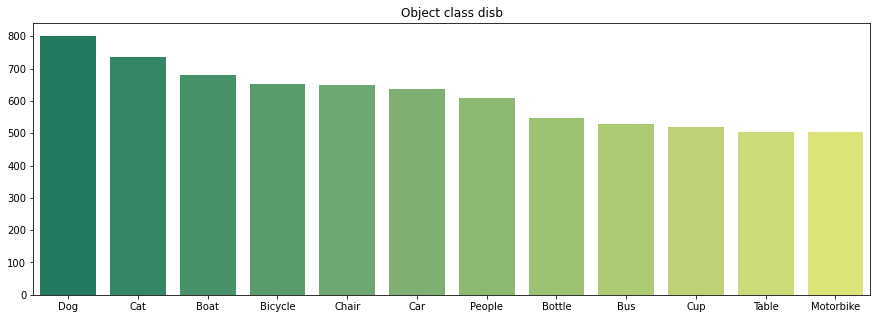

In [39]:
class_labels = dict(data['classes'].value_counts())
labels =[]
count =[]
for i,j in class_labels.items():
    labels.append(class_dic[i])
    count.append(j)
plt.figure(figsize=(15,5))
sns.barplot(x=labels,y=count,palette='summer')
plt.title('Object class disb')
plt.show()

The Bicycle data shape is (652, 5)


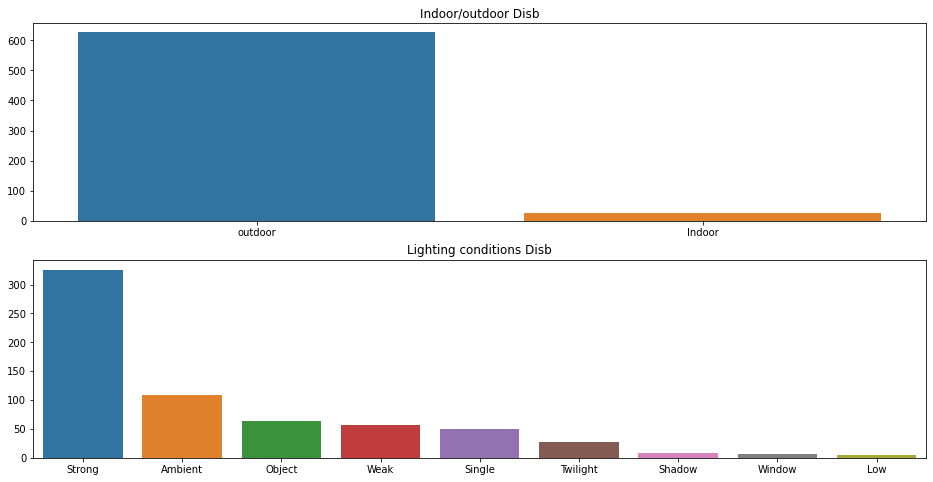

In [40]:
get_class_analysis(1)


Below are few of the Bicycle images in different lighting conditions


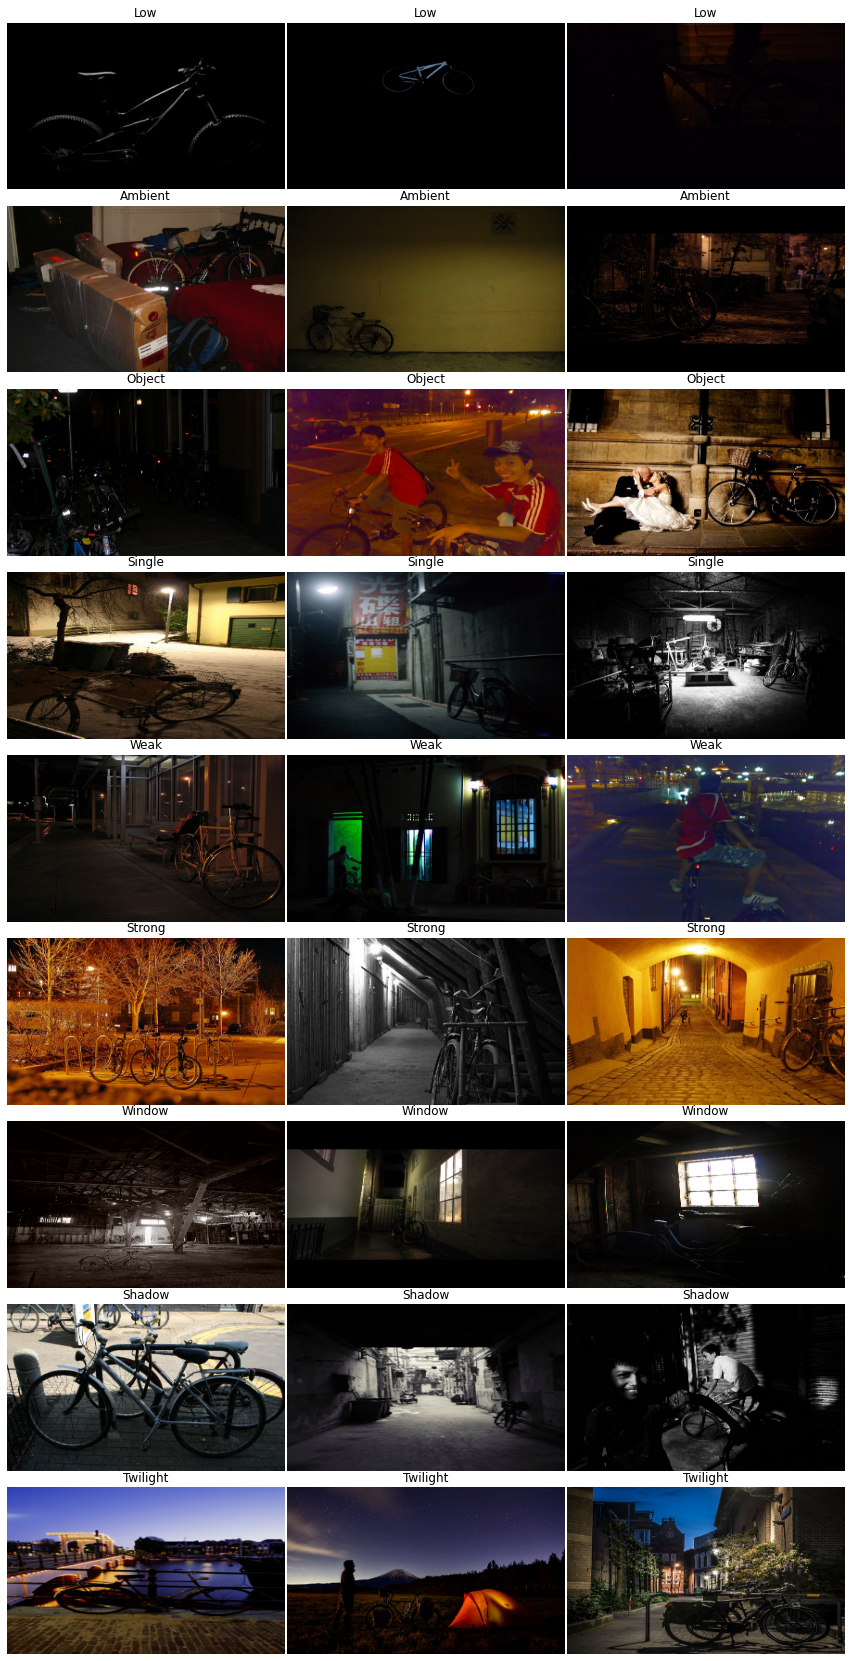

In [41]:
plot_sample_images(1,3)


Below are few of the Car images in different lighting conditions


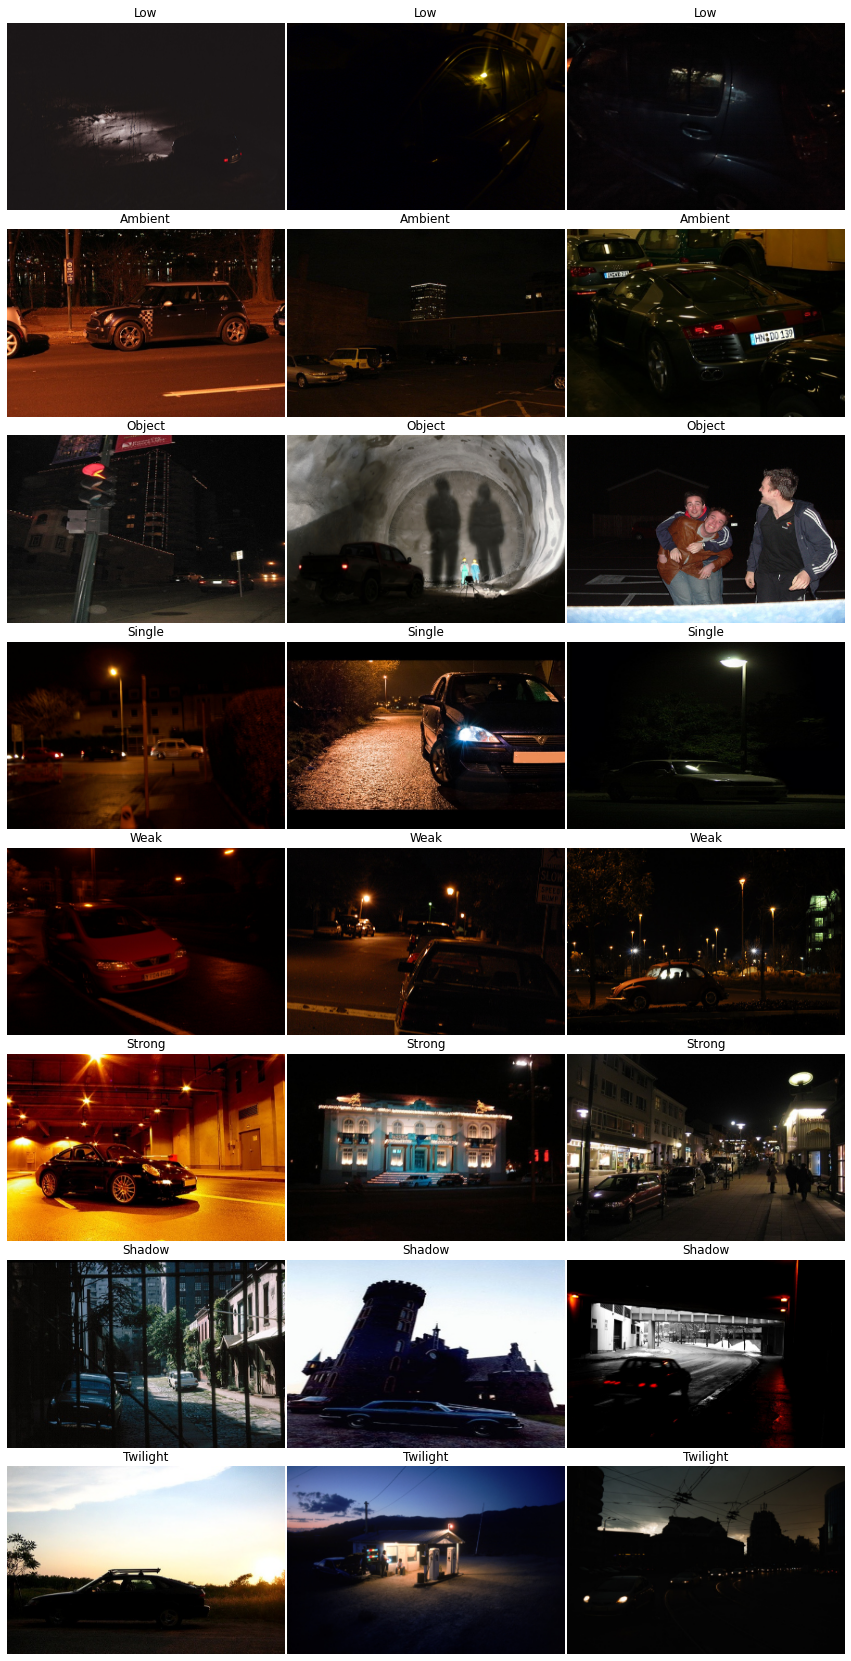

In [42]:
plot_sample_images(5,3)
